In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_distributions(n, mean=0, std=2, inner_std=1):
    centers = np.random.normal(mean, std, n)
    functions = [lambda num_samples=1, x=c, s=inner_std: np.random.normal(x, s, num_samples) for c in centers]
    return functions, centers

def plot_distributions_violin(functions, centers, n_samples=500):
    k = len(centers)
    samples = np.zeros((n_samples, k))
    for j in range(k):
        samples[:, j] = functions[j](n_samples)

    plt.figure(figsize=(12, 6))
    violin_parts = plt.violinplot(samples, showmeans=False, showextrema=False)

    for i, vp in enumerate(violin_parts['bodies']):
        mean_val = np.mean(samples[:, i])
        vp.set_facecolor('blue')
        vp.set_alpha(0.5)
        plt.scatter(i+1, mean_val, color='black', s=10, zorder=3)
        plt.text(i+1, mean_val, f'{mean_val:.2f}', color='black', ha='center', va='bottom')

    plt.xlabel('Center Index')
    plt.ylabel('Generated Values')
    plt.title('Violin Plot of Gaussian Distributions')
    plt.xticks(np.arange(1, k + 1), labels=[f'Index {i}' for i in range(k)])
    plt.show()

Centers: [-0.63959154  0.21851873 -1.11397669  0.83810971 -0.65363874]


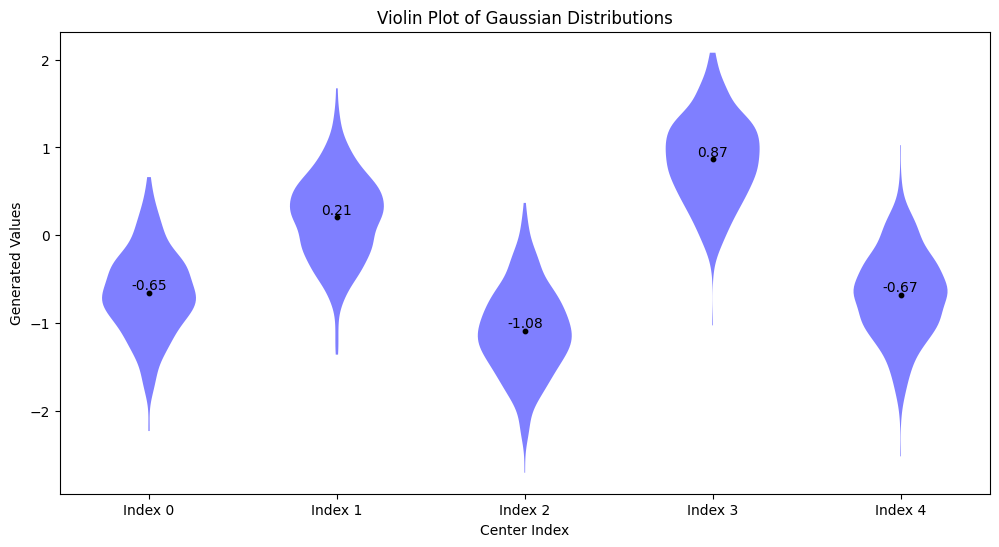

In [ ]:
# Example distribution
functions, centers = generate_distributions(5, mean=0, std=1, inner_std=0.5)
print("Centers:", centers)
plot_distributions_violin(functions, centers)

In [ ]:
class multi_bandit_model():
  def __init__(self, actions, initial_reward=0):
    self.actions = actions
    self.Q = np.asarray([initial_reward for _ in range(len(actions))])
    self.action_counts = np.zeros(len(actions))
    self.total_reward = 0

  def argmax(self, Q):
    max_value = np.max(Q)
    max_indices = np.where(Q == max_value)[0]
    random_index = np.random.choice(max_indices)
    return random_index

  def simulate(self, iterations, epsilon=0.1, verbose="none"):
    '''
    verbose = "none" | "sparse" | "max"
      "none" leads to no statements printed
      "sparce" leads to updates every 10% of the iterations
      "max" leads to statements printed every iteration
    '''

    percent_10 = iterations // 10

    for i in range(iterations):
      choice = np.random.choice([0, 1], p=[epsilon, 1-epsilon])

      if (choice == 0):
        # random actions from list
        index = np.random.choice(len(self.actions))
      else:
        index = self.argmax(self.Q)

      action = self.actions[index]
      reward = np.squeeze(action())
      self.action_counts[index] += 1
      self.total_reward += reward
      self.Q[index] = self.Q[index] + (1/self.action_counts[index]) * (reward - self.Q[index])

      if verbose == "max" or (verbose == "sparse" and i % percent_10 == 0):
        print(f"Iter {i}: Action choice: {index} Reward: {np.round(reward, 2)} (average reward: {np.round(self.total_reward / np.sum(self.action_counts), 2)})")

In [ ]:
for i in range(20):
  model = multi_bandit_model(functions)
  model.simulate(10000, epsilon=0.1, verbose="none")
  print(f"Rewards: {model.total_reward}, actions: {model.action_counts}, average: {np.round(model.total_reward / np.sum(model.action_counts), 2)}")

Rewards: -2768.0975436505255, actions: [2010. 1961. 2036. 1989. 2004.], average: -0.28
Rewards: -2745.9280763766033, actions: [2038. 2070. 1933. 1932. 2027.], average: -0.27
Rewards: -2654.933699943971, actions: [2018. 1972. 2003. 2033. 1974.], average: -0.27
Rewards: -2604.0510586925097, actions: [1997. 2025. 1932. 2037. 2009.], average: -0.26
Rewards: -2821.224836271855, actions: [1952. 2040. 2055. 1971. 1982.], average: -0.28
Rewards: -2625.5021828179806, actions: [1973. 2023. 1962. 2008. 2034.], average: -0.26
Rewards: -2813.8212957597016, actions: [1988. 1998. 2005. 1991. 2018.], average: -0.28
Rewards: -2564.1403716714067, actions: [2009. 2024. 2008. 1985. 1974.], average: -0.26
Rewards: -2743.5747828307153, actions: [2011. 1975. 2049. 1967. 1998.], average: -0.27
Rewards: -2757.213632458941, actions: [2103. 1992. 1983. 1987. 1935.], average: -0.28
Rewards: -2732.5364178834698, actions: [1954. 1945. 2040. 2047. 2014.], average: -0.27
Rewards: -2582.4101060182916, actions: [1959. 